Análisis frecuencial

Para continuar se realizará el análisis frecuencial de señales simuladas que representan la captura realizada del sensor inercial (IMU) cuando este está en movimiento.

Como en el caso anterior (estático) se inicia con cargar los datos.

Text(0.5, 0, 'Muestras')

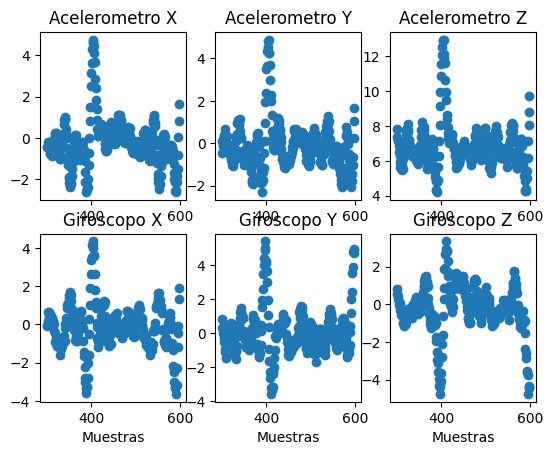

In [2]:
import numpy as np
import matplotlib.pyplot as plt
M = np.genfromtxt("motion.csv", delimiter=",")
Ac_x = M[:,0]
Ac_y = M[:,1]
Ac_z = M[:,2]

Gy_x = M[:,3]
Gy_y = M[:,4]
Gy_z = M[:,5]

n=np.arange(len(Ac_x))
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(n[300:599], Ac_x[300:599])
axs[0, 0].set_title("Acelerometro X")
axs[0, 1].scatter(n[300:599], Ac_y[300:599])
axs[0, 1].set_title("Acelerometro Y")
axs[0, 2].scatter(n[300:599], Ac_z[300:599])
axs[0, 2].set_title("Acelerometro Z")

axs[1, 0].scatter(n[300:599], Gy_x[300:599])
axs[1, 0].set_title("Giroscopo X")
axs[1, 0].set_xlabel("Muestras")
axs[1, 1].scatter(n[300:599], Gy_y[300:599])
axs[1, 1].set_title("Giroscopo Y")
axs[1, 1].set_xlabel("Muestras")
axs[1, 2].scatter(n[300:599], Gy_z[300:599])
axs[1, 2].set_title("Giroscopo Z")
axs[1, 2].set_xlabel("Muestras")


A partir de los gráficos se observa que las señales presentan un cierto comportamiento rítmico, pero no es posible determinar que tanto afecta el ruido a estas señales.

Para comprender la información del sensor, resulta útil observar el espectro de frecuencia. Se procede de la misma forma que antes calculado la FFT y obteniendo la magnitud del espectro.

In [3]:
FAc_x = np.absolute(np.fft.fft(Ac_x))  
FAc_y = np.absolute(np.fft.fft(Ac_y))  
FAc_z = np.absolute(np.fft.fft(Ac_z))

FGy_x = np.absolute(np.fft.fft(Gy_x)) 
FGy_y = np.absolute(np.fft.fft(Gy_y)) 
FGy_z = np.absolute(np.fft.fft(Gy_z))

Luego se procede a obtener las gráficas correspondientes.

Text(0.5, 0, 'Frecuencia (Hz)')

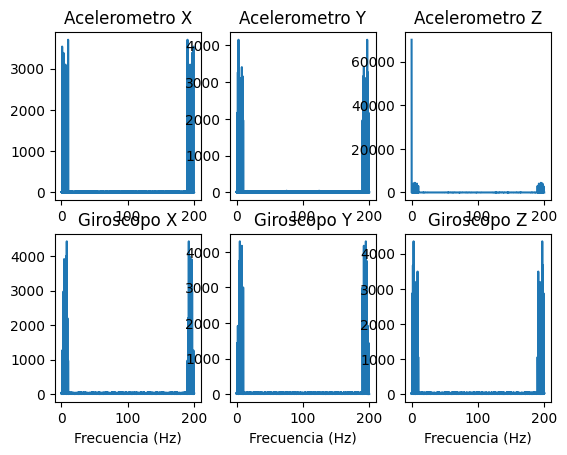

In [4]:
fr = n*200/len(FAc_x)
fig, axs = plt.subplots(2, 3)
axs[0, 0].plot(fr,FAc_x)
axs[0, 0].set_title("Acelerometro X")
axs[0, 1].plot(fr,FAc_y)
axs[0, 1].set_title("Acelerometro Y")
axs[0, 2].plot(fr,FAc_z)
axs[0, 2].set_title("Acelerometro Z")

axs[1, 0].plot(fr,FGy_x)
axs[1, 0].set_title("Giroscopo X")
axs[1, 0].set_xlabel("Frecuencia (Hz)")
axs[1, 1].plot(fr,FGy_y)
axs[1, 1].set_title("Giroscopo Y")
axs[1, 1].set_xlabel("Frecuencia (Hz)")
axs[1, 2].plot(fr,FGy_z)
axs[1, 2].set_title("Giroscopo Z")
axs[1, 2].set_xlabel("Frecuencia (Hz)")

A partir de la observación de los gráficos se observa que las amplitudes son de un orden mucho mayor que las mismas gráficas obtenidas con el sensor quieto.

Lo anterior sugiere que las información relacionada con el movimiento tiene una proporción mucho mayor al ruido presente. Para ello se le sugiere hacer zoom en diferentes partes de los gráficos. es importante observar los valores de altura los componentes más grandes del espectro de frecuencia. Recuerde que para conocer la amplitud del armónico de interes, se debe dividir el valor de la altura de la muestra entre el número total de muestras.

Es de anotar que la información relacionada con el movimiento se encuentra dentro de un cierto ancho de banda que es facilmente visible. Para este caso, el mencionado ancho de banda está entre 0 y 10 Hz.

El gráfico del acelerómetro en el eje Z presenta un comportamiento diferente por el efecto de la gravedad,  el cual se ve en la frecuencia 0 Hz.
